In [5]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [6]:
import csv

In [8]:
circle_data = []
trig_data = []

def clean_data(data):
    ndata = []
    data_loss = 0
    for e in data:
        if e == "":
            data_loss +=1
            continue
        ndata.append(int(float(e)))
    for _ in range(data_loss):
        ndata.append(0)
    return ndata

# 打开CSV文件
with open('0.csv', mode='r', encoding='utf-8') as file:
    # 创建CSV阅读器
    reader = csv.reader(file)
    # 逐行读取CSV文件
    for row in reader:
        row = row[:-1]
        row = clean_data(row)
        circle_data.append(row)

# 打开CSV文件
with open('1.csv', mode='r', encoding='utf-8') as file:
    # 创建CSV阅读器
    reader = csv.reader(file)
    # 逐行读取CSV文件
    for row in reader:
        row = row[:-1]
        row = clean_data(row)
        trig_data.append(row)

t_c_x = circle_data[:-20]
v_c_x = circle_data[-20:]
t_t_x = trig_data[:-20]
v_t_x = trig_data[-20:]

In [13]:
c_d = tf.Variable(initial_value=t_c_x, dtype=tf.float32)
t_d = tf.Variable(initial_value=t_t_x, dtype=tf.float32)
train_data = tf.concat([c_d,t_d], axis = 0)

vc_d = tf.Variable(initial_value=v_c_x, dtype=tf.float32)
vt_d = tf.Variable(initial_value=v_t_x, dtype=tf.float32)
vald_data = tf.concat([vc_d,vt_d], axis = 0)

labble1 = tf.zeros(shape=(101, 1), dtype=tf.float32)
labble2 = tf.ones(shape=(115, 1), dtype=tf.float32)
labble = tf.concat([labble1,labble2], axis = 0)

vald_labble = tf.concat([tf.zeros(shape=(20, 1), dtype=tf.float32),tf.ones(shape=(20, 1), dtype=tf.float32)], axis = 0)

# 计算最大值和最小值
data_min = tf.reduce_min(train_data)
data_max = tf.reduce_max(train_data)

# 应用最小-最大缩放公式
sc_train = 2 * ((train_data - data_min) / (data_max - data_min)) - 1
sc_vald = 2 * ((vald_data - data_min) / (data_max - data_min)) - 1

In [30]:
model = keras.Sequential([
    layers.Dense(300, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [31]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [32]:
history = model.fit(
    sc_train,
    labble,
    epochs=30,
    batch_size=20,
    validation_data=(sc_vald, vald_labble))

Epoch 1/30
11/11 [==============================] - 0s 7ms/step - loss: 0.3981 - accuracy: 0.8380 - val_loss: 0.2336 - val_accuracy: 0.9250
Epoch 2/30
11/11 [==============================] - 0s 3ms/step - loss: 0.2434 - accuracy: 0.9213 - val_loss: 0.1882 - val_accuracy: 0.9250
Epoch 3/30
11/11 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.9306 - val_loss: 0.1487 - val_accuracy: 0.9750
Epoch 4/30
11/11 [==============================] - 0s 3ms/step - loss: 0.1816 - accuracy: 0.9537 - val_loss: 0.1347 - val_accuracy: 0.9500
Epoch 5/30
11/11 [==============================] - 0s 3ms/step - loss: 0.1602 - accuracy: 0.9491 - val_loss: 0.1361 - val_accuracy: 0.9500
Epoch 6/30
11/11 [==============================] - 0s 3ms/step - loss: 0.1449 - accuracy: 0.9583 - val_loss: 0.1107 - val_accuracy: 0.9500
Epoch 7/30
11/11 [==============================] - 0s 3ms/step - loss: 0.1295 - accuracy: 0.9583 - val_loss: 0.0970 - val_accuracy: 0.9750
Epoch 8/30
11/11 [==

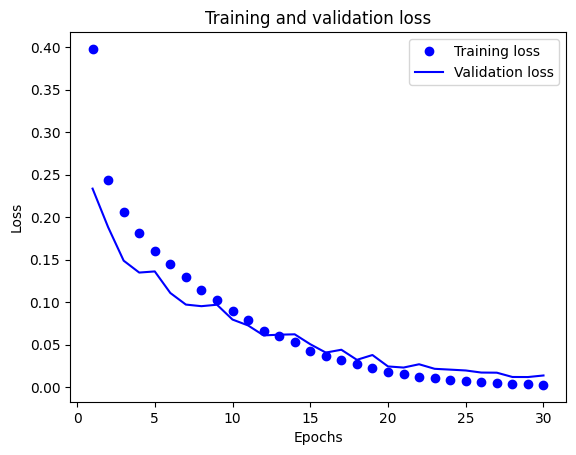

In [33]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

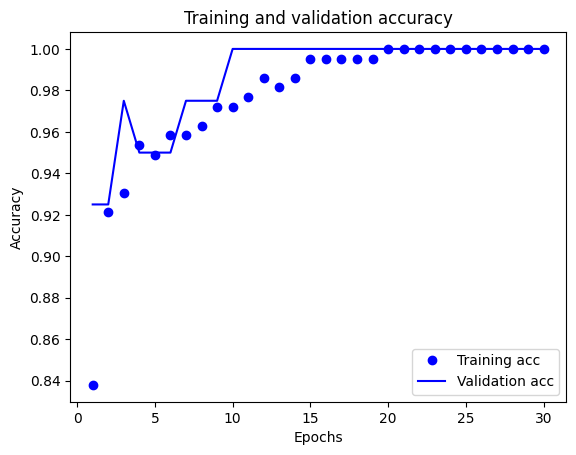

In [34]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()